In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [2]:
df = pd.read_csv('./energy.dat')

In [3]:
df.head()

,Date,Consumption
0,01-Apr-15,357.073
1,02-Apr-15,341.931
2,03-Apr-15,318.777
3,04-Apr-15,312.494
4,05-Apr-15,270.837


In [ ]:
# converting date for plotting;


# Exploring Data

In [5]:
df.describe()

,Consumption
count,1827.000000
mean,257.885096
std,100.993368
min,82.675000
25%,174.672500
50%,242.719000
75%,327.841000
max,589.269000


No handles with labels found to put in legend.


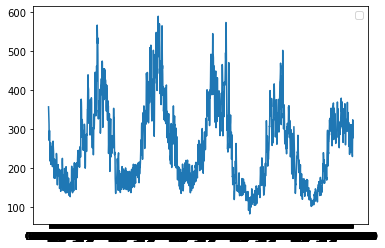

In [6]:
plt.plot(df.Date, df.Consumption)
plt.legend()

<AxesSubplot:>

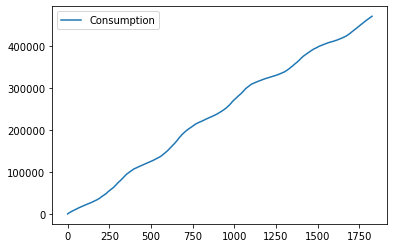

In [11]:
ts = df.cumsum()
ts.plot()

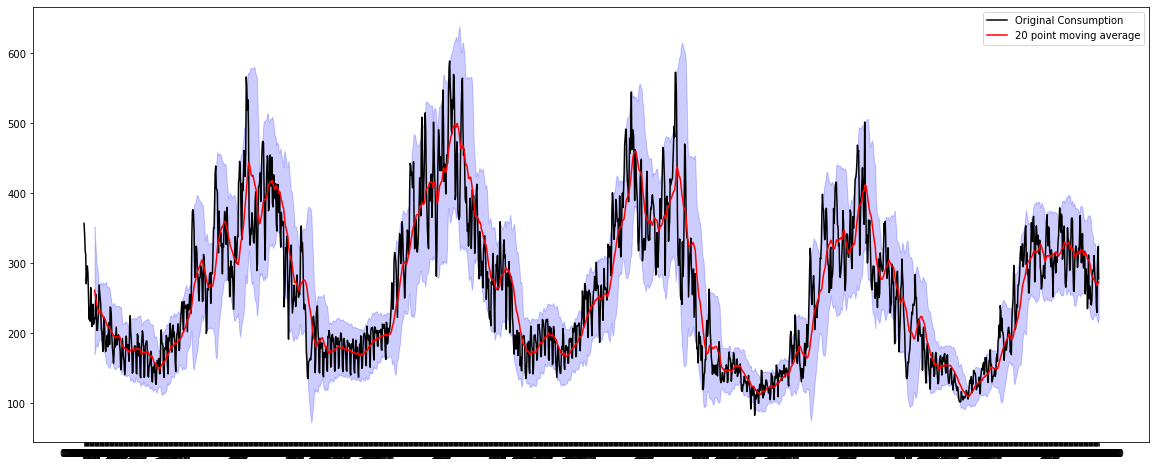

In [29]:
ma = df['Consumption'].rolling(20).mean()

mstd = df['Consumption'].rolling(20).std()

plt.figure(figsize=(20, 8));

plt.plot(df['Date'], df['Consumption'], "k", label="Original Consumption");

plt.plot(ma.index, ma, "r", label="20 point moving average");

plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2);

plt.legend()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

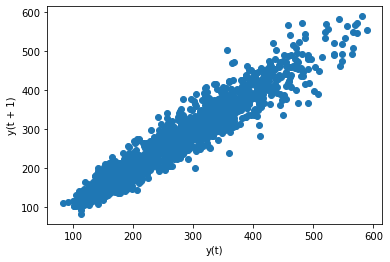

In [24]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df.Consumption)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

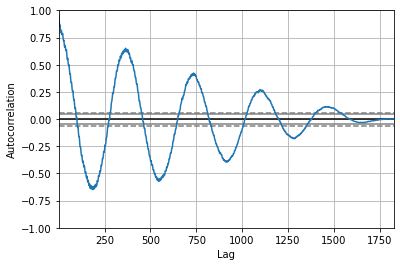

In [28]:
autocorrelation_plot(df.Consumption)

## Exploring ARIMA

We need to find the following 2 charecteristics:
1. Stationary points of the data
2. Order of the AR model (by checking autocorrelation plot)

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf

P-value:  0.08461241579544276


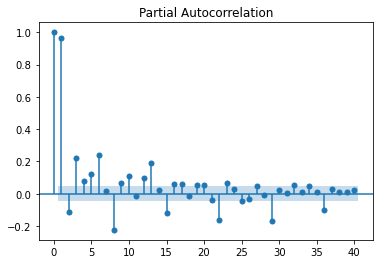

In [23]:
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
# Check the value of p-value
print("P-value: ", df_stationarityTest[1])

# find the order of AR model to be trained
partial_autocorr = plot_pacf(df['Consumption'], lags=40)

In [18]:
# Training ARIMA
train_split = 0.8 # using 80% of data for training
train_data = df['Consumption'][:int(len(df)*0.8)]
test_data = df['Consumption'][int(len(df)*0.8):]

# train the model;
arima_model = AutoReg(train_data, lags=140).fit()

# print summary;
print(arima_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 1461
Model:                   AutoReg(140)   Log Likelihood               -5991.321
Method:               Conditional MLE   S.D. of innovations             22.567
Date:                Sun, 14 Aug 2022   AIC                              6.448
Time:                        15:51:57   BIC                              7.005
Sample:                           140   HQIC                             6.657
                                 1461                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           16.8496      3.691      4.565      0.000       9.616      24.083
Consumption.L1       1.0366      0.028     37.666      0.000       0.983       1.091
Consumption.L2      -0.1835 

/Users/samxtneont9021xvl03/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


## Explore model predictions

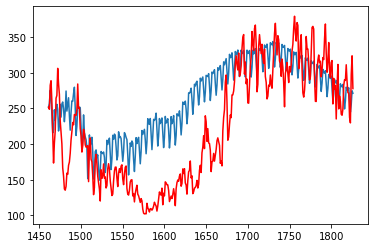

In [19]:
# make predictions
pred = arima_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

# Plot the prediction vs test data
plt.plot(pred)
plt.plot(test_data, color='red')